[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# How to Train YOLO11 Object Detection on a Custom Dataset

---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/ultralytics/ultralytics)

YOLO11 builds on the advancements introduced in YOLOv9 and YOLOv10 earlier this year, incorporating improved architectural designs, enhanced feature extraction techniques, and optimized training methods.

YOLO11m achieves a higher mean mAP score on the COCO dataset while using 22% fewer parameters than YOLOv8m, making it computationally lighter without sacrificing performance.

YOLOv11 is available in 5 different sizes, ranging from `2.6M` to `56.9M` parameters, and capable of achieving from `39.5` to `54.7` mAP on the COCO dataset.

## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [9]:
!nvidia-smi

Mon Jul 21 14:07:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   33C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [10]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


## Install YOLO11 via Ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


## Fine-tune YOLO11 on custom dataset

**NOTE:** When training YOLOv11, make sure your data is located in `datasets`. If you'd like to change the default location of the data you want to use for fine-tuning, you can do so through Ultralytics' `settings.json`. In this tutorial, we will use one of the [datasets](https://universe.roboflow.com/liangdianzhong/-qvdww) available on [Roboflow Universe](https://universe.roboflow.com/). When downloading, make sure to select the `yolov11` export format.

In [20]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from roboflow import Roboflow
rf = Roboflow(api_key="zaTOipkeE2TzOl2exrTe")
project = rf.workspace("intershipproject").project("arabic-numbers-vmdt0-zwjub")
version = project.version(1)
dataset = version.download("yolov11")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...
Generating version still in progress. Progress: 100.0%



Extracting Dataset Version Zip to arabic-numbers-1 in yolov11:: 100%|██████████| 3398/3398 [00:00<00:00, 5612.96it/s]


## Custom Training

In [21]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data="/content/datasets/datasets/arabic-numbers-1/data.yaml" epochs=20 imgsz=640 plots=True

/content/datasets
New https://pypi.org/project/ultralytics/8.3.168 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/datasets/arabic-numbers-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [22]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix_normalized.png			    train_batch2.jpg
confusion_matrix.png				    train_batch810.jpg
events.out.tfevents.1753107282.bf6ee62b99ad.8875.0  train_batch811.jpg
F1_curve.png					    train_batch812.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


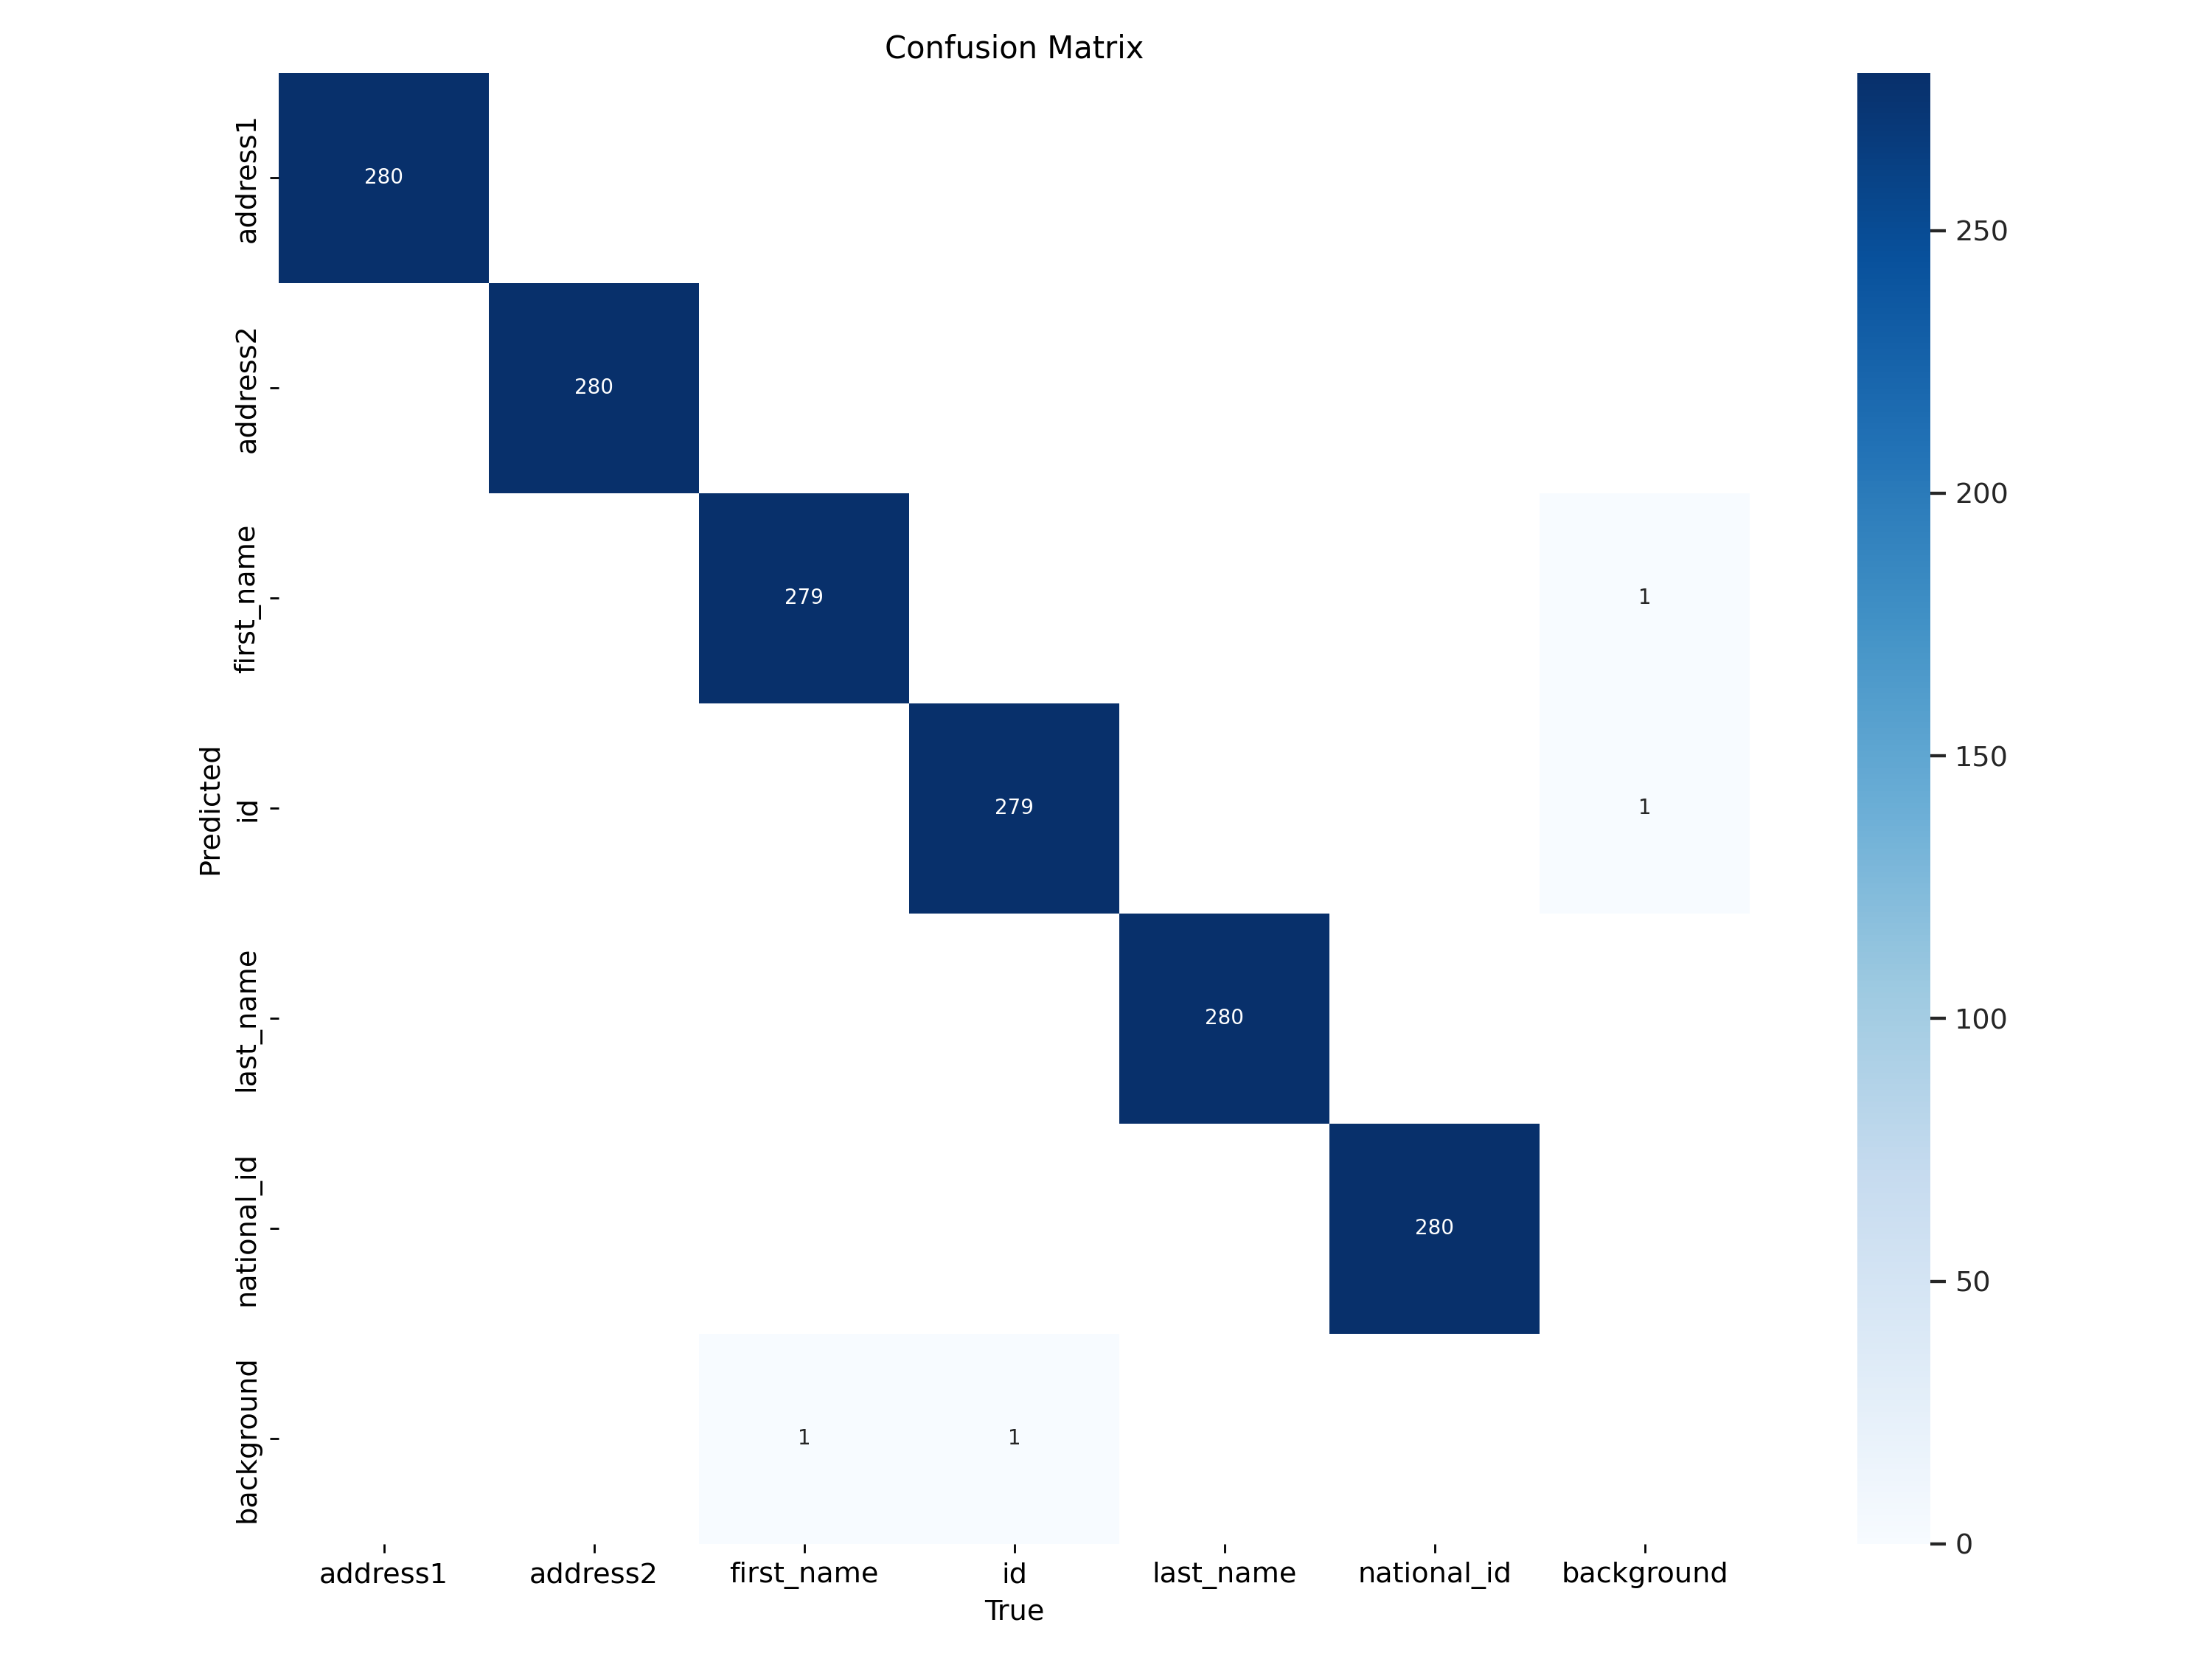

In [23]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

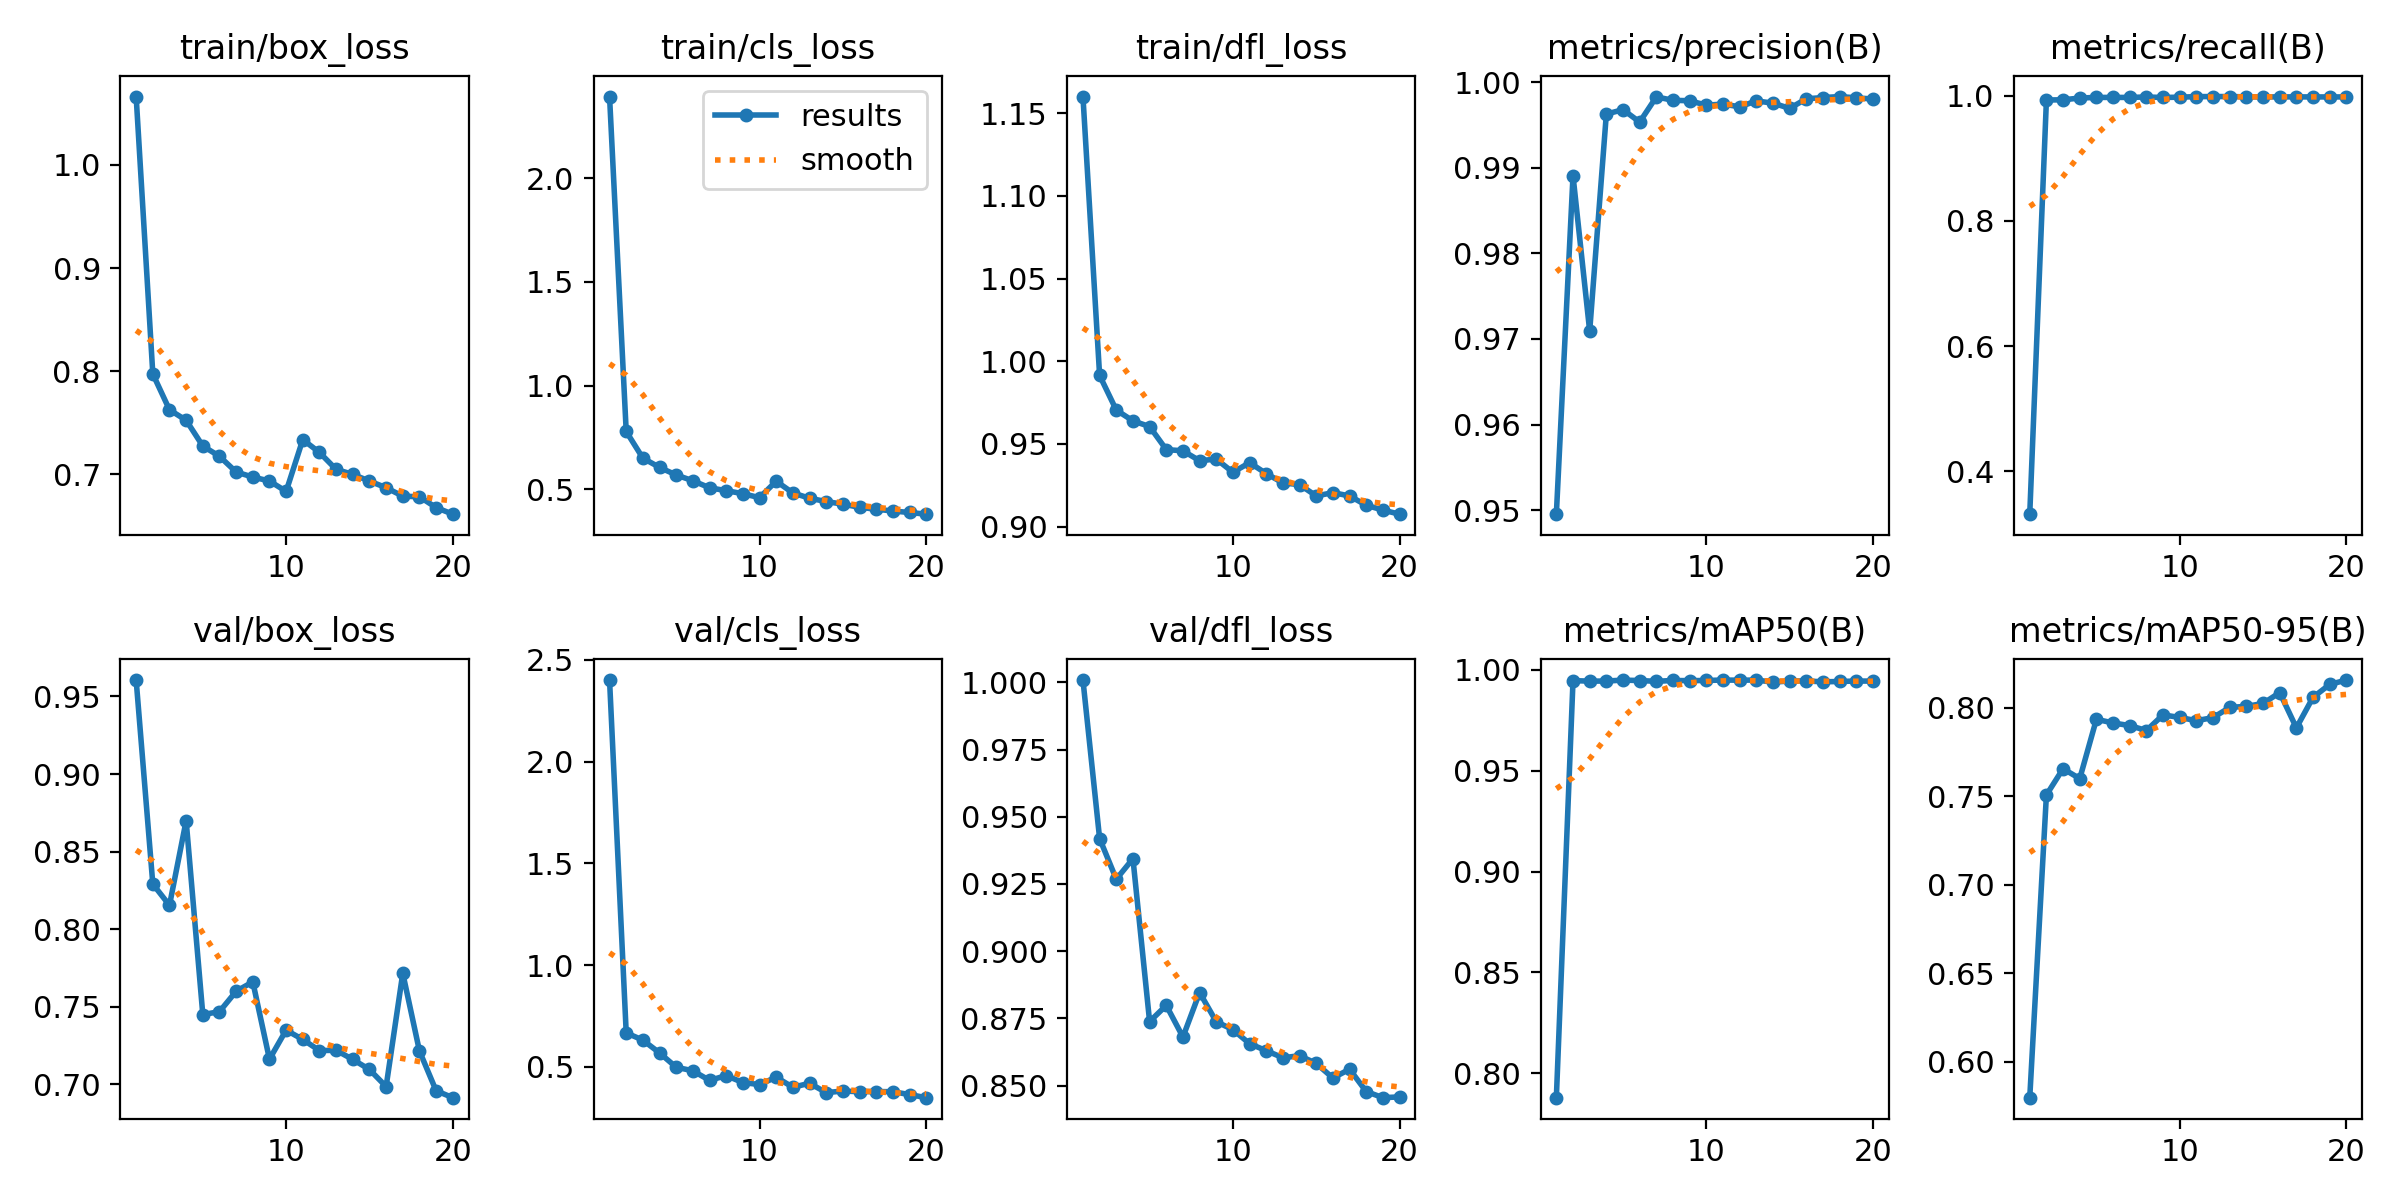

In [24]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

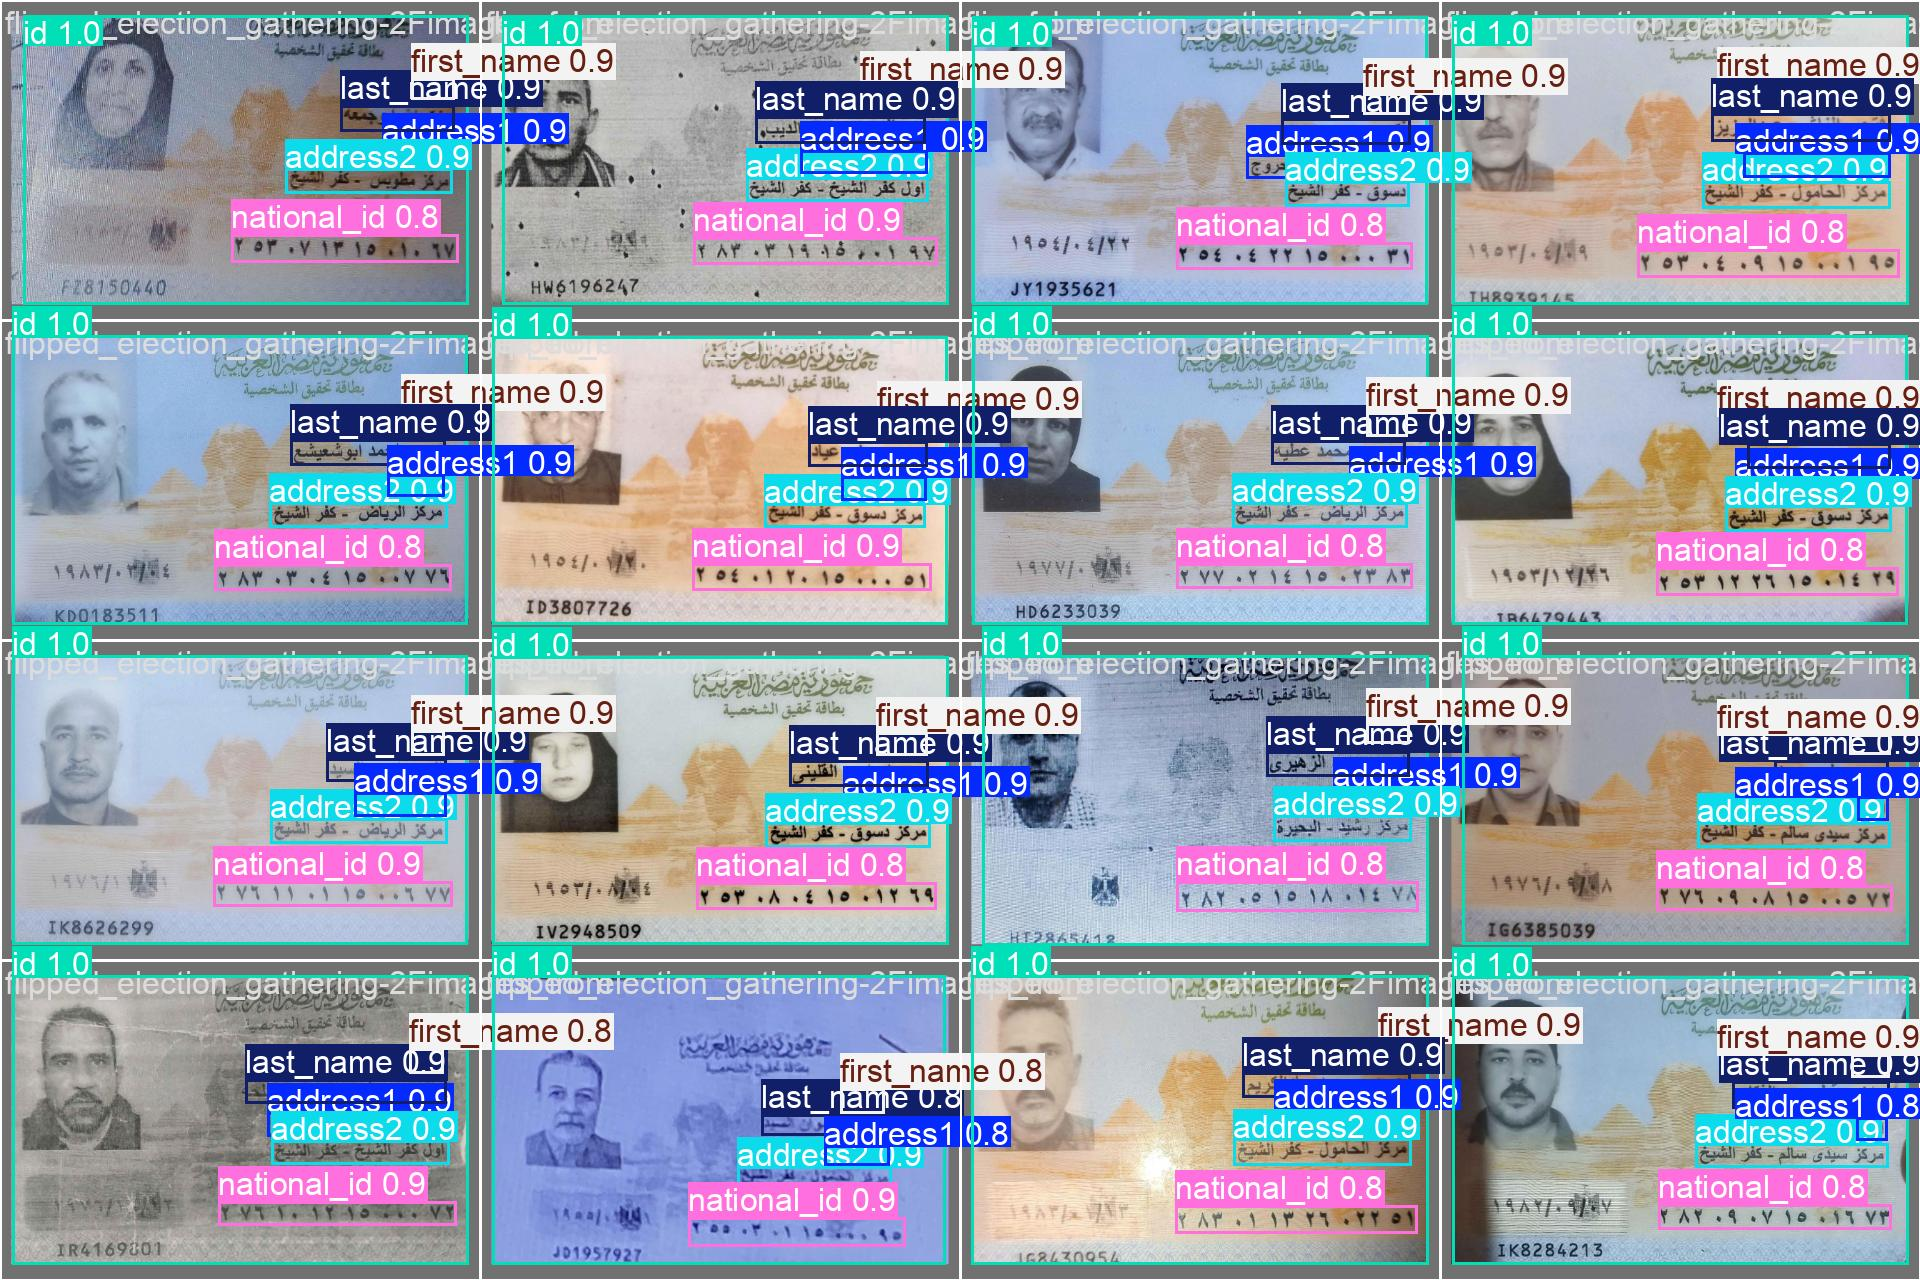

In [25]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [26]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/datasets/datasets/arabic-numbers-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100% 280/280 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 6, len(boxes) = 1680. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 18/18 [00:05<00:00,  3.44it/s]
                   all        280       1680      0.998      0.998      0.994      0.815
              address1        280        280      0.999          1      0.995       0.77
              address2        280        280      0.999          1      0.995      0.817
            first_name 

## Inference with custom model

In [27]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/datasets/arabic-numbers-1/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/130 /content/datasets/datasets/arabic-numbers-1/test/images/flipped_election_gathering-2Fimages_from_29601051501112-2F87132-2F-2FeOk7n5Pu3FzJmTM6fL8e-87132-frontImage_jpg.rf.6439d0cb9375d3e971ab593a7672b298.jpg: 416x640 1 address1, 1 address2, 1 first_name, 1 id, 1 last_name, 1 national_id, 42.8ms
image 2/130 /content/datasets/datasets/arabic-numbers-1/test/images/flipped_election_gathering-2Fimages_from_29601051501112-2F87132-2F-2FfeiQxOuyqbYWtoqlaNLy-87132-frontImage_jpg.rf.8fa698de60c06553635674f43ec906cc.jpg: 416x640 1 address1, 1 address2, 1 first_name, 1 id, 1 last_name, 1 national_id, 8.6ms
image 3/130 /content/datasets/datasets/arabic-numbers-1/test/images/flipped_election_gathering-2Fimages_from_29605241500223-2F118205-2F-2FFvhFGUsyxvMqokdLPddW-118205-frontImage_jpg.rf.e99a2a89670414763e6aa0643ea47efc.jpg:

**NOTE:** Let's take a look at few results.

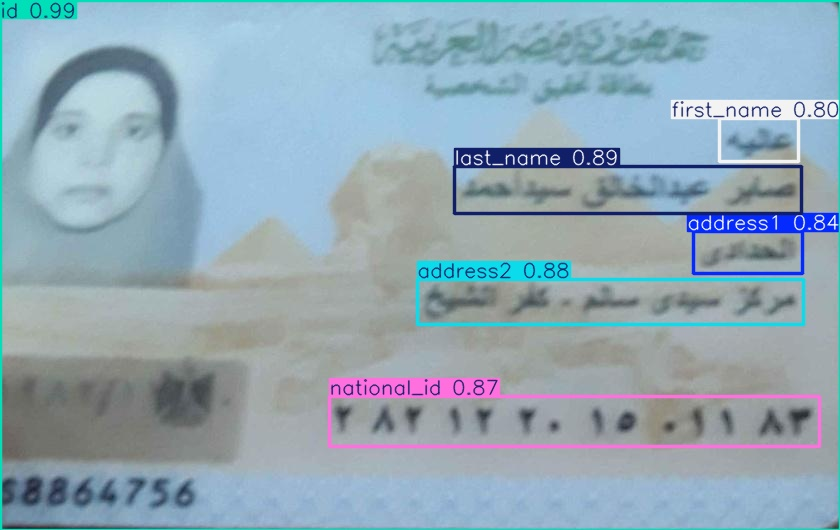

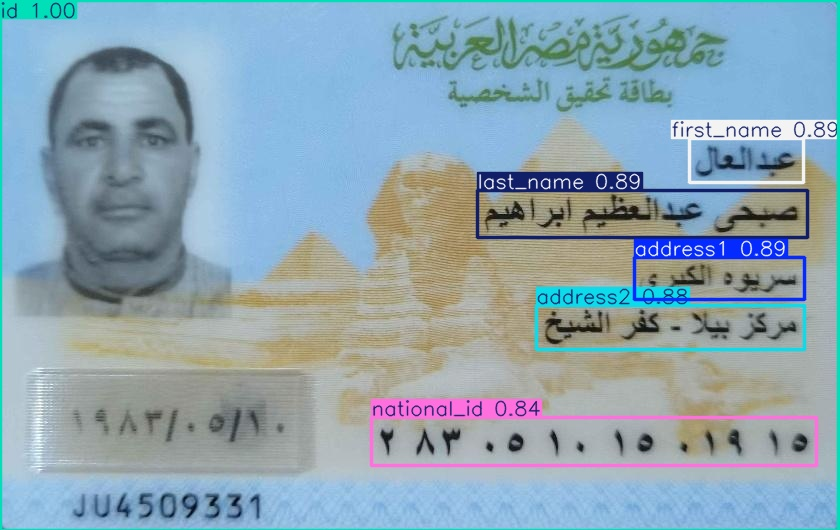

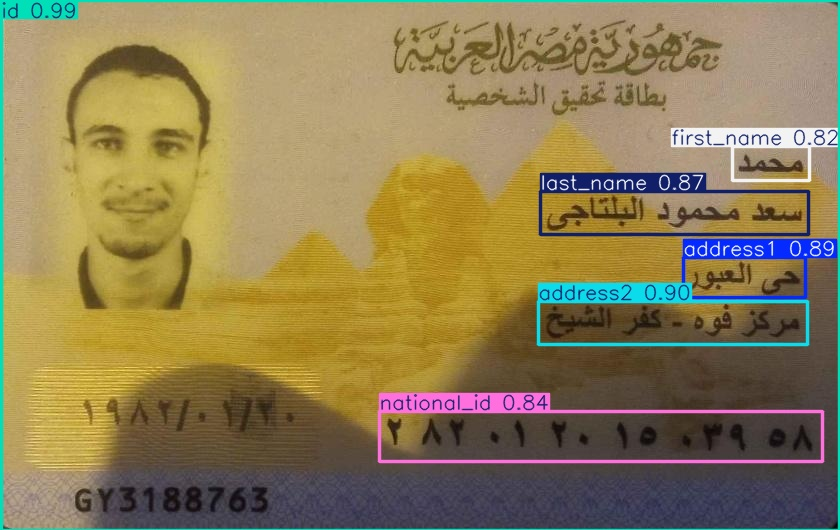

In [28]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

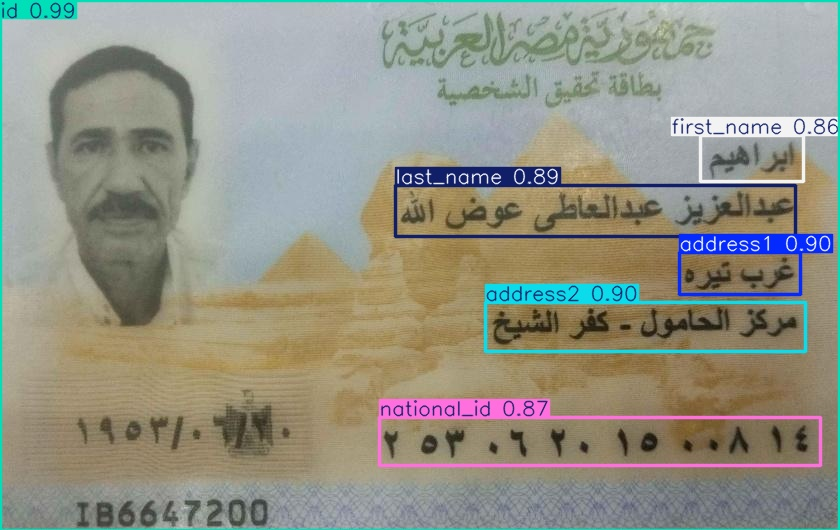

In [31]:
IPyImage(filename='/content/datasets/runs/detect/predict2/flipped_election_gathering-2Fimages_from_30308081501342-2F164962-2F-2FQe279GTH5mEipkPGKlLK-164962-frontImage_jpg.rf.23433a720d2e01a1084ba5f68ce65545.jpg', width=600)

In [32]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/WhatsApp Image 2025-07-20 at 12.18.34_e5519247.jpg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/WhatsApp Image 2025-07-20 at 12.18.34_e5519247.jpg: 448x640 1 address1, 1 address2, 1 first_name, 1 id, 1 last_name, 1 national_id, 44.0ms
Speed: 3.0ms preprocess, 44.0ms inference, 148.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


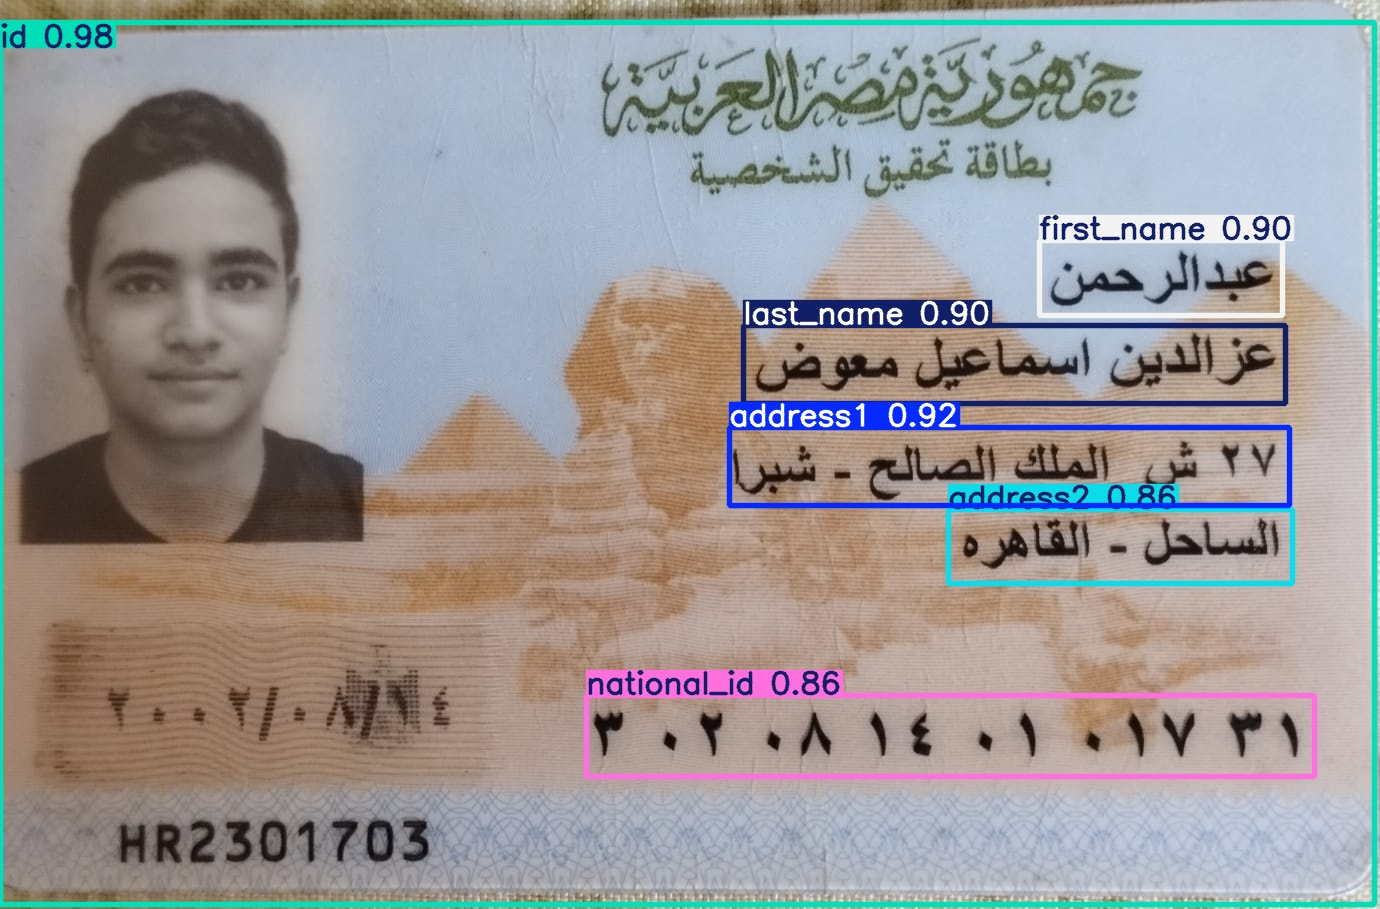

In [33]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'/content/datasets/runs/detect/predict3/WhatsApp Image 2025-07-20 at 12.18.34_e5519247.jpg', width=600)

In [36]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/neew.jpg' save=True

Ultralytics 8.3.40 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,322 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/neew.jpg: 512x640 1 address1, 1 address2, 1 first_name, 1 id, 1 last_name, 1 national_id, 42.6ms
Speed: 3.1ms preprocess, 42.6ms inference, 153.4ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


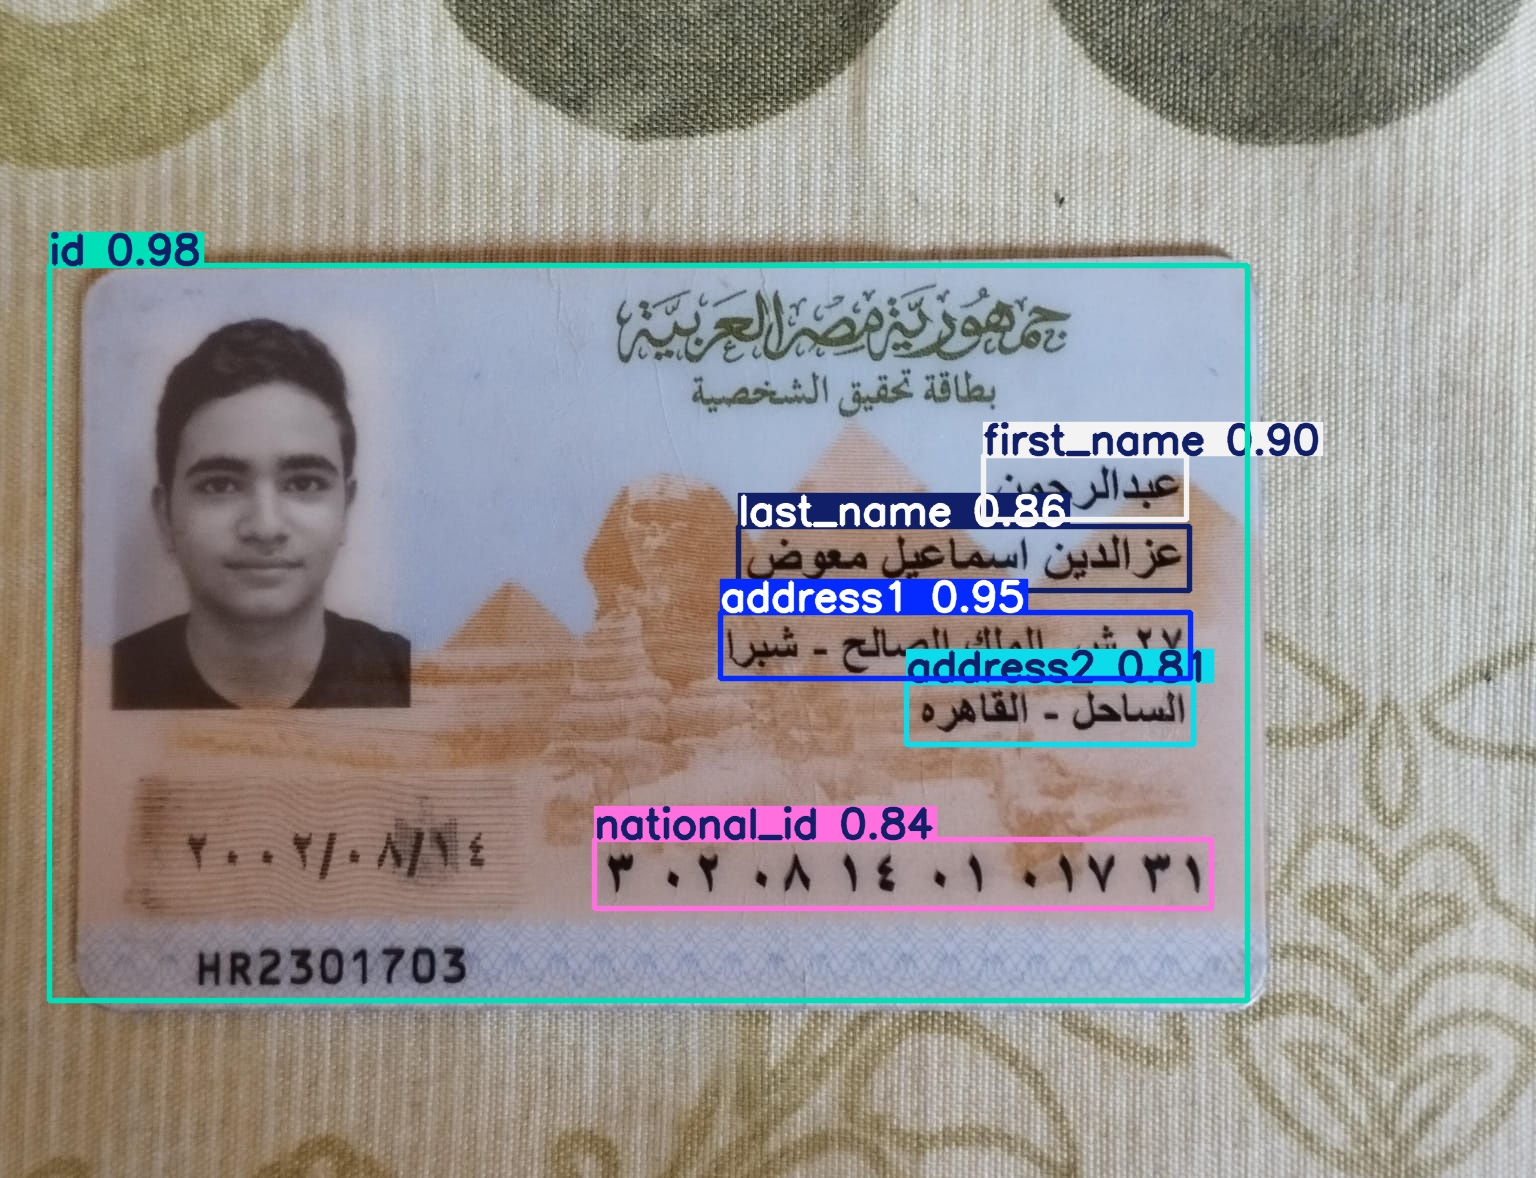

In [37]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'//content/datasets/runs/detect/predict5/neew.jpg', width=600)